![title](https://doity.com.br/media/doity/eventos/evento-20025-logo_organizador.png)

# Prova de Descoberta do Conhecimento

* **Prof. Cleilton Lima Rocha** climarocha@gmail.com
* **Data de entrega: 29/12/2020**
* **Alunos**:
  * Allan Reffson Granja Lima - arglbr@gmail.com
  * Fábio Henrique Barros - fabio.hb@gmail.com

Para este projeto exploraremos os dados **Call_Data.csv** disponível na pasta.


Para facilitar a administração da segurança pública, o Departamento de Polícia de Seattle dividiu a cidade em 5 partes, cada uma com uma delegacia. Cada delegacia foi subdividida em setores, e estes foram divididos em beats (hondas). A administração tem um dataset chamado Call_Data, para obter maiores informações acesse este [link](https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy).

O objetivo do nosso projeto é apoiar os policiais quanto as medidas prescritivas que eles devem tomar ao tentarem resolver uma chamada. Para isto eles têm disponível o histórico de tudo o que já foi resolvido, por ele e por seus colegas, e sua solução de Data Science capaz de prever a variável alvo da nossa prova será **Event Clearance Description**.

Boa prova e hands on!

**PS.:**
* Quando houver necessidade de splitar os dados aplique a proporção 70 para treino e 30 para teste
* Quando houver necessidade de utilizar o random_state defina o valor 100
* O título do email deve ser "Prova KDD - Turma 6 - [Membros da equipe]"
* Envie o código fonte e o report (File ==> Download As ==> Html ou PDF), com o nome dos membros da equipe, para meu email, climarocha@gmail.com até o dia **29/12**.

# Questões

## **Importação de Bibliotecas**

In [43]:
# Import pandas
import pandas as pd
 
# Import numpy
import numpy as np
 
# Import Seaborn
import seaborn as sns
 
# Import matplotlib para gráficos
import matplotlib.pyplot as plt
 
# Functions creating iterators for efficient looping
import itertools as it

import sys
import pickle
import os.path

# Imports do Scikit Learn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve


RANDOM_STATE=100

## **1. Importe o data set *call_data.csv* e considere a variável alvo 'Event Clearance Description' (0,5 pontos)** 
* 1.1. Como está o balanceamento das classes?*
* P.S.: Não é obrigatório aplicar o undersampling and oversampling sobre o dataset
* P.S.: Se desejar você pode usar o dataset **call_data_small.csv** apenas pra agilizar o desenvolvimento no final tudo deve ser realizado com o **call_data.csv**

In [2]:
df_train = pd.read_csv("https://drive.google.com/u/0/uc?id=13bi4MEhFWVbzD3Rpln9VWN5pJu-7GsRz&export=download") # Call_Data.csv
#df_train = pd.read_csv("https://drive.google.com/u/0/uc?id=1_vIwludPLU4pijpIxEmkNmpEbf9wnznC&export=download") # Call_Data_Small.csv
df_test = pd.read_csv("https://drive.google.com/u/0/uc?id=1yjmCp88KXnrFklSMeaoSYAouV1O9vE-A&export=download") # test_call_data.csv

#df_train = pd.read_csv("./Call_Data.csv")
#df_train = pd.read_csv("./Call_Data_Small.csv")
#df_test = pd.read_csv("./test_call_data.csv")

df = df_train

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232442 entries, 0 to 232441
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Unnamed: 0                   232442 non-null  int64 
 1   CAD Event Number             232442 non-null  int64 
 2   Event Clearance Description  232442 non-null  object
 3   Call Type                    232442 non-null  object
 4   Priority                     232442 non-null  int64 
 5   Initial Call Type            232442 non-null  object
 6   Final Call Type              232442 non-null  object
 7   Original Time Queued         232442 non-null  object
 8   Arrived Time                 232442 non-null  object
 9   Precinct                     232442 non-null  object
 10  Sector                       230892 non-null  object
 11  Beat                         232442 non-null  object
dtypes: int64(3), object(9)
memory usage: 21.3+ MB
None


,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,1,2009000189336,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1
1,2,2009000189340,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,WEST,KING,K1
2,5,2009000189344,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORTH,NORA,N3
3,6,2009000189345,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ACC - HIT AND RUN (NO INJURIES). INCLUDES IP/JO,--TRAFFIC - MV COLLISION INVESTIGATION,06/02/2009 03:54:42 AM,Jan 1 1900 12:00:00:000AM,SOUTH,OCEAN,O1
4,8,2009000189348,REPORT WRITTEN (NO ARREST),ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--DISTURBANCE - OTHER,06/02/2009 03:58:02 AM,Jun 2 2009 03:58:02:000AM,WEST,KING,K2


col_0,count
Event Clearance Description,
CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),31099
FALSE COMPLAINT/UNFOUNDED,10453
ORAL WARNING GIVEN,46311
PHYSICAL ARREST MADE,21145
PROBLEM SOLVING PROJECT,7894
REPORT WRITTEN (NO ARREST),91710
UNABLE TO LOCATE INCIDENT OR COMPLAINANT,23830


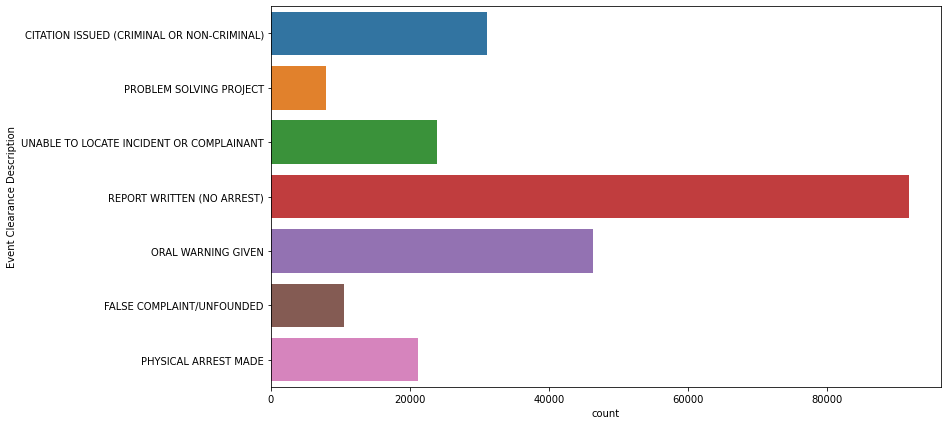

In [3]:
target = 'Event Clearance Description'
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(y=target, data=df)
pd.crosstab(index=df[target], columns="count")

#### **Resposta:**
* Observamos que há um claro desquilíbrio entre as sete classes de *Event Clearance Description*

## **2. Realize o EDA que você julgar necessário (análise exploratória dos dados), o objetivo do EDA é mostrar alguns insights sobre os dados** (1,0 pontos)
   * PS.: Utilize recursos visuais, por exemplo gráficos

## EDA para **Call Type**

In [4]:
def eda_feature(feature, figsize=(20,15)):
    #
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)
    sns.countplot(ax=ax1, data=df, y=feature)
    g = sns.countplot(ax=ax2, data=df, y=feature, hue=target)
    g.legend(loc='right', bbox_to_anchor=(1.0, 0.25))
    #
    df_eda = pd.crosstab(index=df[feature], columns="count")
    print(df_eda, df_eda.describe(), df[feature].isna().sum())

col_0                          count
Call Type                           
911                            63752
ALARM CALL (NOT POLICE ALARM)   8835
HISTORY CALL (RETRO)               3
IN PERSON COMPLAINT                5
ONVIEW                         90312
POLICE (VARDA) ALARM              12
PROACTIVE (OFFICER INITIATED)      6
SCHEDULED EVENT (RECURRING)        1
TELEPHONE OTHER, NOT 911       69516 col_0         count
count      9.000000
mean   25826.888889
std    37295.865784
min        1.000000
25%        5.000000
50%       12.000000
75%    63752.000000
max    90312.000000 0


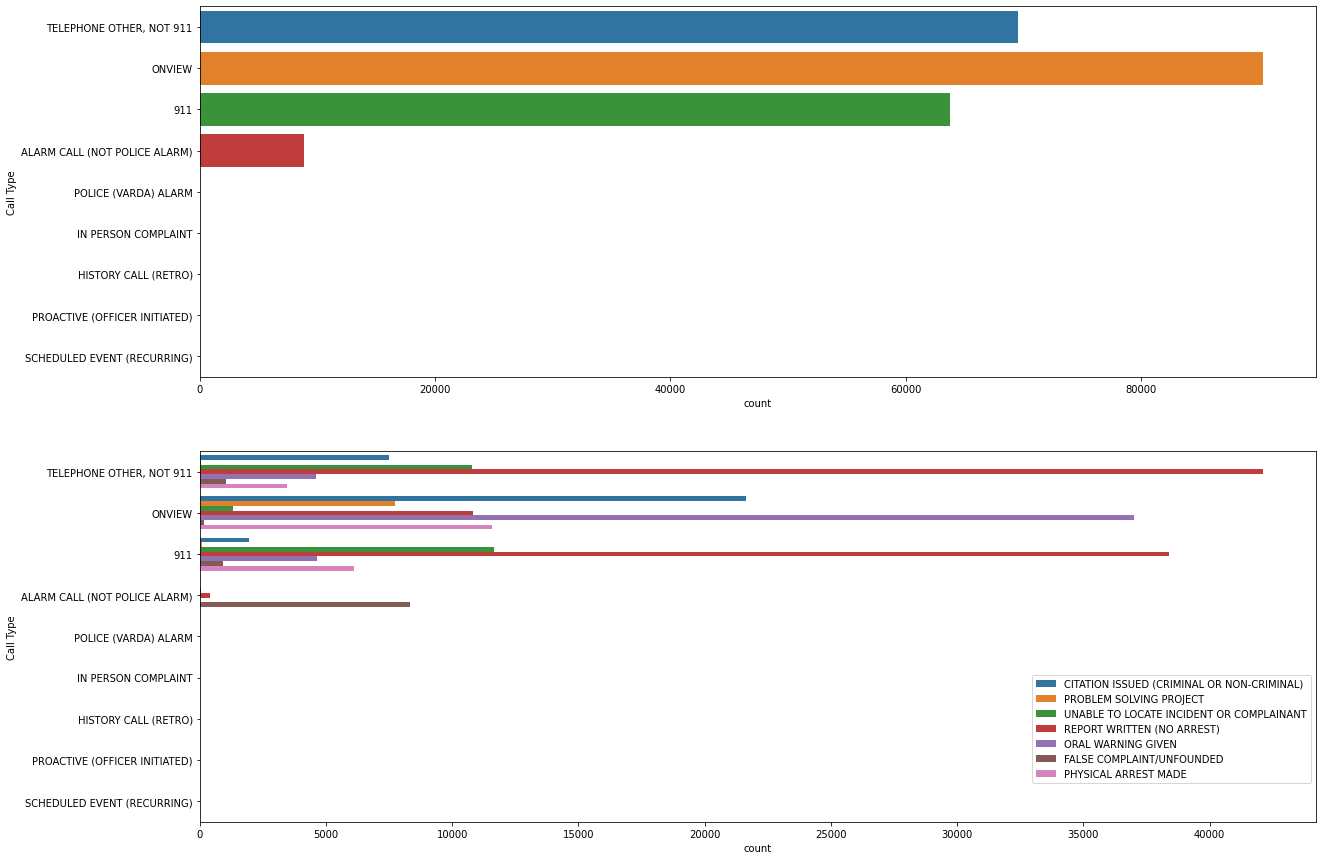

In [5]:
feature = 'Call Type'
eda_feature(feature)

#### **Resposta**:
* Observamos que há nove tipos de *Call Type.* 
* A frequencia de cada tipo varia significativamente entre elas. 
* Há cinco tipos com frequencia muito baixa. 
* A alta variância entre os tipos é representado pelo valor de $\sigma = 37295.8$.
* Não há ausência de dados.
* A classe *REPORT WRITTEN (NO ARREST)* corresponde a maioria das amostras para *TELEPHONE OTHER, NOT 911* e *911*.

## EDA para **Priority**

col_0     count
Priority       
1         19535
2         41015
3         83867
4          6870
5          6779
6         12053
7         61804
8             1
9           518 col_0         count
count      9.000000
mean   25826.888889
std    29901.287018
min        1.000000
25%     6779.000000
50%    12053.000000
75%    41015.000000
max    83867.000000 0


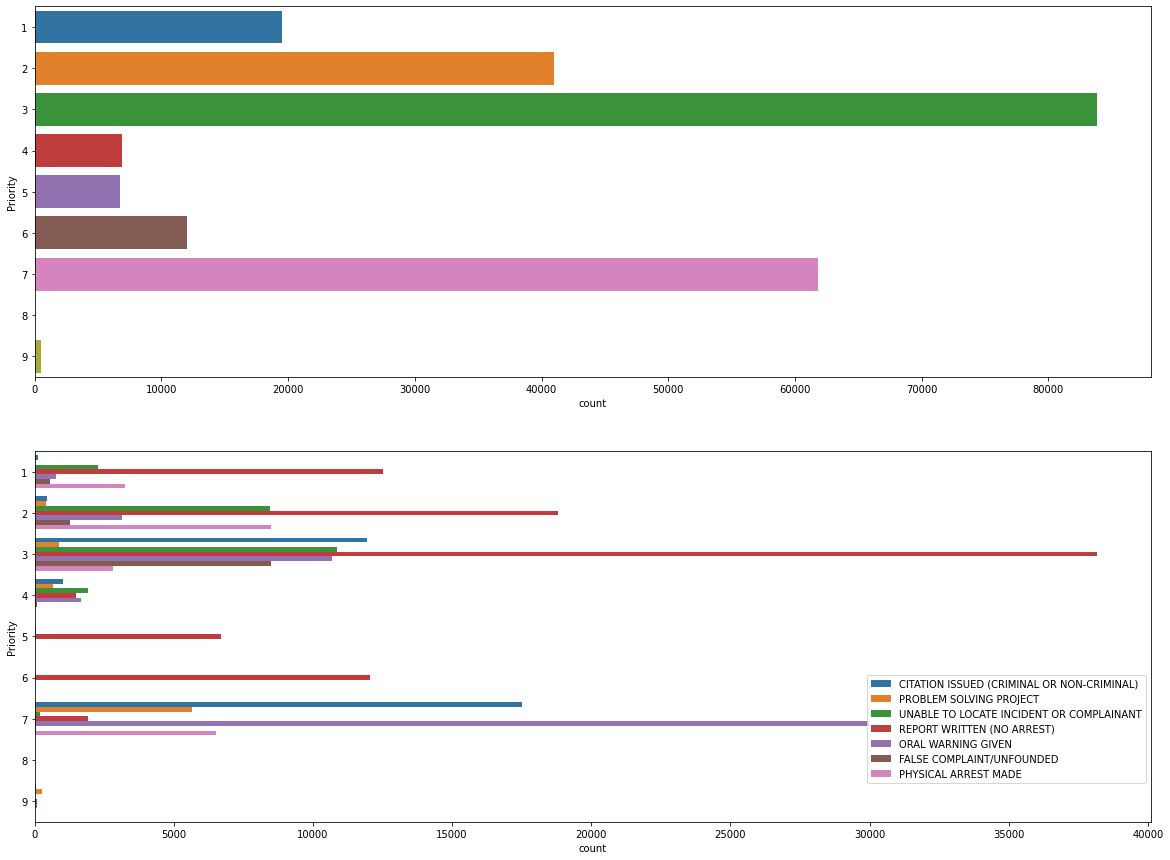

In [6]:
feature = 'Priority'
eda_feature(feature)

#### **Resposta**:
* Observamos que há nove tipos de *Priority*. 
* A frequencia de tica na casa do milhares com exceção das *Priority* 8 e 9. 
* Também notamos um valor elevado de $\sigma = 29901.2$. 
* Não há ausência de dados.
* A classe *REPORT WRITTEN (NO ARREST)* corresponde a maioria das amostras para *Priority 3*, *Priority 2* e *Priority 1*.
* A classe *FALSE COMPLAINT/UNFOUNDED* corresponde a maioria das amostras para *Priority 7**.

## EDA **Precinct**

col_0      count
Precinct        
EAST       37164
NORTH      62675
SOUTH      41083
SOUTHWEST  22175
UNKNOWN     1550
WEST       67795 col_0         count
count      6.000000
mean   38740.333333
std    24829.603297
min     1550.000000
25%    25922.250000
50%    39123.500000
75%    57277.000000
max    67795.000000 0


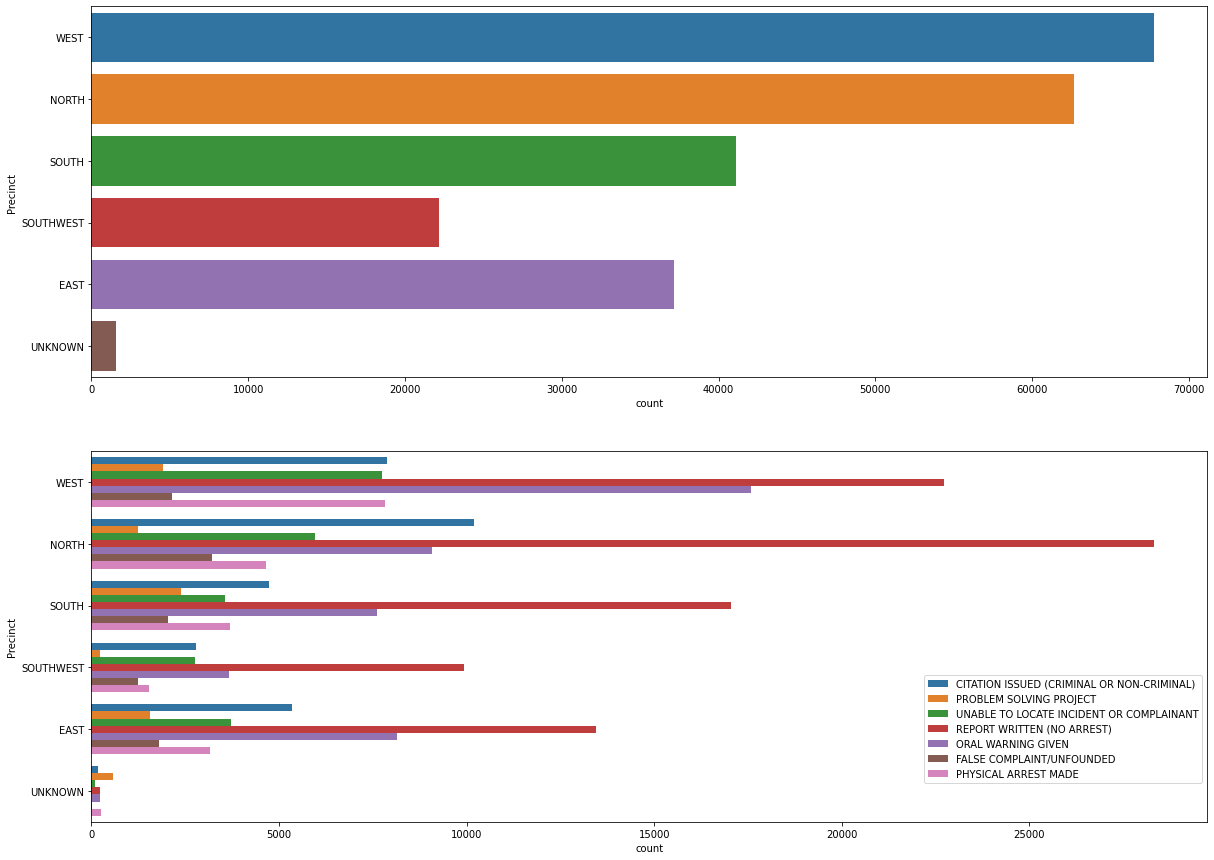

In [7]:
feature = 'Precinct'
eda_feature(feature)

#### **Resposta**:
* Observamos que há seis tipos de *Precinct*. 
* Há um tipo desconhecido com frequencia signicativa. 
* Também notamos um valor elevado de $\sigma = 24829.6$. 
* Não há ausência de dados.
* As classes *REPORT WRITTEN (NO ARREST)* e *FALSE COMPLAINT/UNFOUNDED* correspondem a maioria das amostras em todas as *Precinct* excetuando-se a *UNKNOWN* .

## EDA **Sector**

col_0    count
Sector        
BOY      15378
CHARLIE  10045
DAVID    18707
EDWARD   16119
FRANK     9965
GEORGE   11000
JOHN     10312
KING     20006
LINCOLN  11145
MARY     15436
NORA     11580
OCEAN     8028
QUEEN    13646
ROBERT   17641
SAM      15414
UNION    14260
WILLIAM  12210 col_0         count
count     17.000000
mean   13581.882353
std     3414.648058
min     8028.000000
25%    11000.000000
50%    13646.000000
75%    15436.000000
max    20006.000000 1550


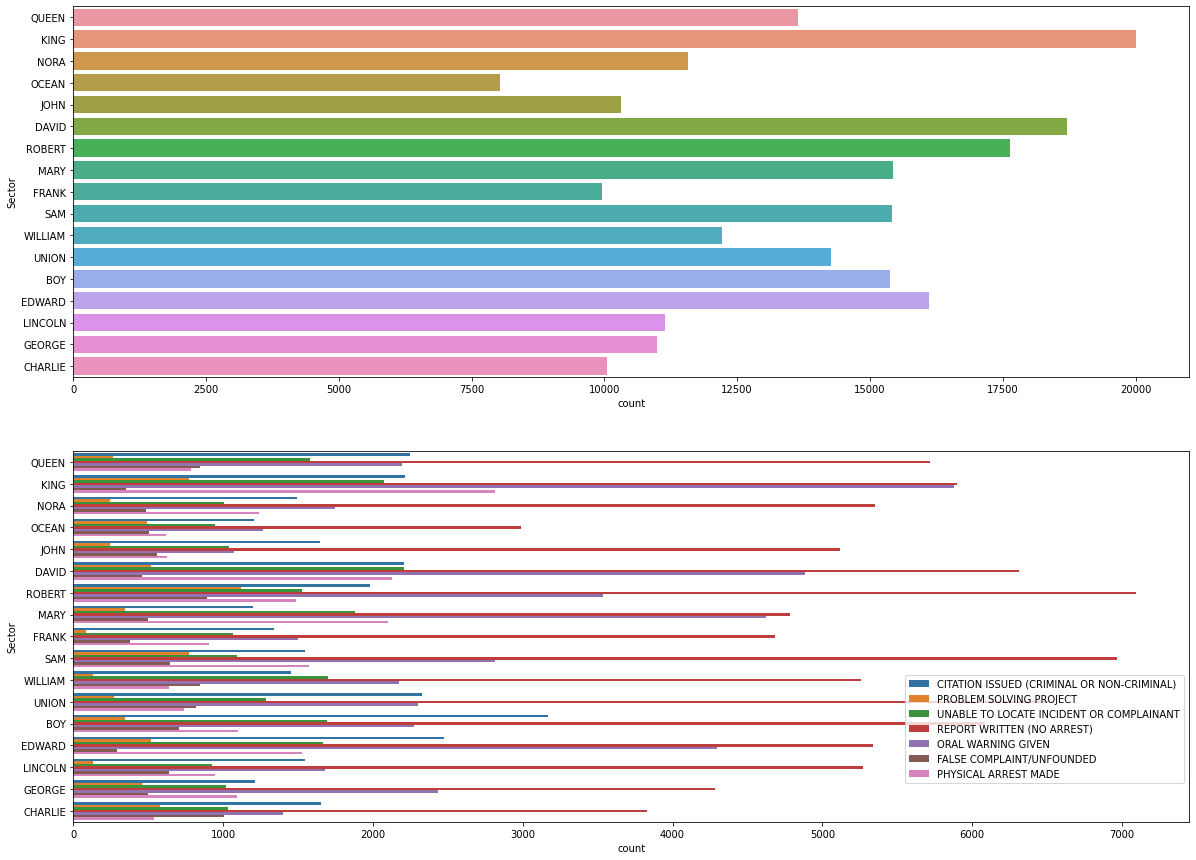

In [8]:
feature = 'Sector'
eda_feature(feature)

#### **Resposta**:
* Observamos que há dezessete tipos de *Sector*. 
* Também notamos um valor elevado de $\sigma = 3414.6$. 
* Há ausência de dados em 1550 eventos.
* As classes *REPORT WRITTEN (NO ARREST)* e *FALSE COMPLAINT/UNFOUNDED* correspondem a maioria das amostras em todas os *Sector*.

## EDA **Beat**

col_0  count
Beat        
99       489
B1      4613
B2      5742
B3      5034
BS         4
...      ...
W         29
W1      5126
W2      3720
W3      3432
WS        15

[89 rows x 1 columns] col_0        count
count    89.000000
mean   2611.707865
std    2469.424004
min       1.000000
25%       7.000000
50%    3123.000000
75%    4668.000000
max    8809.000000 0


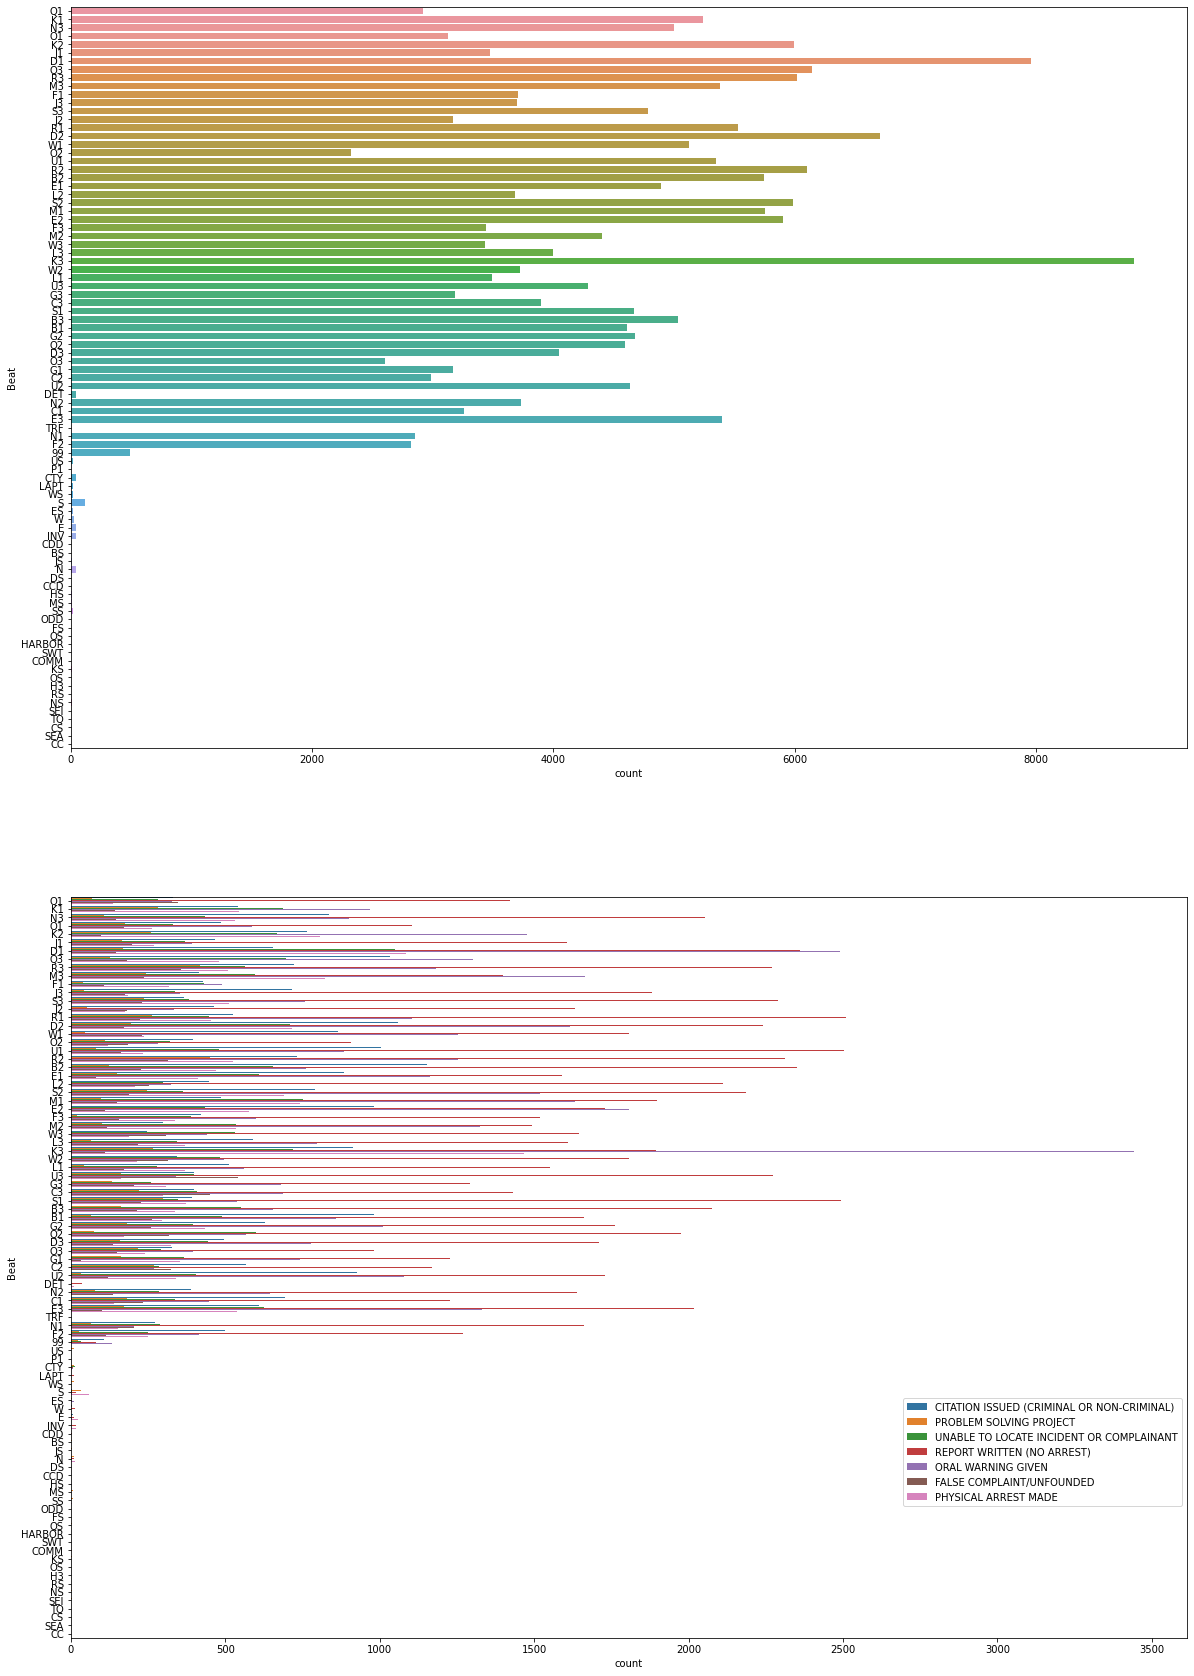

In [9]:
feature = 'Beat'
eda_feature(feature, figsize=(20,30))

#### **Resposta**:
* Observamos *Beat* possue valores que não seguem o padrão de dois dígitos formados pela primeira letra do *Sector* seguido dos dígitos 1 ou 2 ou 3. 
* Essa variável sugere tratamento de dados. 
* A frequencia dos itens fora do padrão possuem não é significativa na determinação das classes alvo.
* Também notamos um valor elevado de $\sigma = 3414.6$. 
* Não há ausência de dados.


## EDA **Initial Call Type**

In [10]:
feature = 'Initial Call Type'
df_eda = pd.crosstab(index=df[feature], columns="count")
df_eda, df_eda.describe(), df[feature].isna().sum()

(col_0                                            count
 Initial Call Type                                     
 --BURGLARY - NON RESIDENTIAL/COMMERCIAL              1
 --FRAUD - FRAUD, INCLUDING BUNCO                     1
 --TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)      1
 -ASSIGNED DUTY - COMMUNITY,SCHOOL,SPECIAL EVENT     72
 -ASSIGNED DUTY - COURT                               8
 ...                                                ...
 WARRANT PICKUP - FROM OTHER AGENCY                  98
 WATER FLOODS (BROKEN MAINS/HYDRANTS, NO HAZ)         6
 WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)        303
 WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)     437
 WIRES DOWN (PHONE, ELECTRICAL,ETC.)                  8
 
 [238 rows x 1 columns],
 col_0         count
 count    238.000000
 mean     976.647059
 std     3051.710541
 min        1.000000
 25%       14.250000
 50%      104.500000
 75%      678.000000
 max    27757.000000,
 0)

#### **Resposta**:
* Observamos *Initial Call Type* possuem mais de duzentos tipos.
* O padrão de classificação é irregular variando entre palavras completas e abreviações.
* A frequencia entre os tipos é irregular.
* Não há ausência de dados.

## EDA **Final Call Type**

In [11]:
feature = 'Final Call Type'
df_eda = pd.crosstab(index=df[feature], columns="count")
df_eda, df_eda.describe(), df[feature].isna().sum()

(col_0                                            count
 Final Call Type                                       
 --ALARM-COMM (INC BANK, ATM, SCHOOLS, BSN)        3554
 --ALARM-COMM ROBB (BANK, PANIC, DURESS)            518
 --ALARM-OTHER (VARDA,PDT,FIRE,LOCAL,METRO,ETC))    207
 --ALARM-RESIDENTIAL BURG                          4042
 --ALARM-RESIDENTIAL PANIC OR DURESS                416
 ...                                                ...
 WARRANT - MISD WARRANT PICKUP                      224
 WARRANT - SEARCH. CAUTION (EXCL NARCOTICS)           8
 WARRANT PICKUP - FROM OTHER AGENCY                  13
 WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)         36
 WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)       6
 
 [317 rows x 1 columns],
 col_0         count
 count    317.000000
 mean     733.255521
 std     2439.382706
 min        1.000000
 25%        7.000000
 50%       40.000000
 75%      294.000000
 max    26080.000000,
 0)

#### **Resposta**:
* Observamos *Final Call Type* possuem mais de trezentos tipos.
* O padrão de classificação é irregular variando entre palavras completas e abreviações.
* A frequencia entre os tipos é irregular. 
* Não há ausência de dados.

## EDA **Original Time Queued**

In [12]:
feature = 'Original Time Queued'
df_eda = pd.crosstab(index=df[feature], columns="count")
df_eda, df_eda.describe(), df[feature].isna().sum()

(col_0                   count
 Original Time Queued         
 01/01/2010 01:01:19 AM      1
 01/01/2010 01:02:54 AM      1
 01/01/2010 01:03:07 PM      1
 01/01/2010 01:04:16 PM      1
 01/01/2010 01:04:25 AM      1
 ...                       ...
 12/31/2009 12:48:28 AM      1
 12/31/2009 12:50:18 PM      1
 12/31/2009 12:51:27 PM      1
 12/31/2009 12:57:11 AM      1
 12/31/2009 12:59:55 PM      1
 
 [231776 rows x 1 columns],
 col_0          count
 count  231776.000000
 mean        1.002873
 std         0.053608
 min         1.000000
 25%         1.000000
 50%         1.000000
 75%         1.000000
 max         3.000000,
 0)

#### **Resposta**:
* Observamos *Original Time Queued* são valores de data e hora de um evento. 
* Será preciso formatar esse variável para um formato de data/hora padrão. 
* Não há ausência de dados.

## EDA **Arrived Time**

In [13]:
feature = 'Arrived Time'
df_eda = pd.crosstab(index=df[feature], columns="count")
df_eda, df_eda.describe(), df[feature].isna().sum()


(col_0                       count
 Arrived Time                     
 Apr  1 2010 01:00:18:000AM      1
 Apr  1 2010 01:00:40:000AM      1
 Apr  1 2010 01:01:02:000AM      1
 Apr  1 2010 01:01:44:000PM      1
 Apr  1 2010 01:02:20:000PM      1
 ...                           ...
 Sep 30 2009 12:50:52:000PM      1
 Sep 30 2009 12:52:56:000AM      1
 Sep 30 2009 12:57:24:000PM      1
 Sep 30 2009 12:58:08:000PM      1
 Sep 30 2009 12:59:18:000PM      1
 
 [217201 rows x 1 columns],
 col_0          count
 count  217201.000000
 mean        1.070170
 std        31.273626
 min         1.000000
 25%         1.000000
 50%         1.000000
 75%         1.000000
 max     14576.000000,
 0)

#### **Resposta**:
* Observamos *Original Time Queued* são valores de data e hora de um evento. 
* Será preciso formatar esse variável para um formato de data/hora padrão. 
* Não há ausência de dados.

## **3. Realize o tratamento que você julgar mais adequado aos dados.** (2,0 pontos)
  * P.S.: Explique, com suas palavras, porque o processo de feature engineering é necessário
  * P.S.: A criação de um pipeline lhe dará pontos extras e melhorará o reaproveitamento de código

#### **Resposta**:

Feature Engeneering consiste no conjunto de atividades necessárias para a coleta e preparação dos dados de origem que serão alvo do estudo. Objetiva tranasformar os dados tornando-os mais "utilizáveis", aumentando assim, seu valor de negócio.

**Separando dados de treino e teste**

In [14]:
target = 'Event Clearance Description'

# Dados de Treinamento
y_train = df_train[target]
X_train = df_train.drop(columns=target)
# Dados de Teste
y_test = df_test[target]
X_test = df_test.drop(columns=target)

In [15]:
df_train.head(), df_test.head()

(   Unnamed: 0  CAD Event Number                 Event Clearance Description  \
 0           1     2009000189336  CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)   
 1           2     2009000189340                     PROBLEM SOLVING PROJECT   
 2           5     2009000189344    UNABLE TO LOCATE INCIDENT OR COMPLAINANT   
 3           6     2009000189345                  REPORT WRITTEN (NO ARREST)   
 4           8     2009000189348                  REPORT WRITTEN (NO ARREST)   
 
                   Call Type  Priority  \
 0  TELEPHONE OTHER, NOT 911         3   
 1                    ONVIEW         7   
 2  TELEPHONE OTHER, NOT 911         2   
 3  TELEPHONE OTHER, NOT 911         2   
 4                    ONVIEW         3   
 
                                  Initial Call Type  \
 0                       TRAFFIC - BLOCKING ROADWAY   
 1     PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY   
 2                 FIGHT - VERBAL/ORAL (NO WEAPONS)   
 3  ACC - HIT AND RUN (NO INJURIES). INCLUDE

In [16]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232442 entries, 0 to 232441
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            232442 non-null  int64 
 1   CAD Event Number      232442 non-null  int64 
 2   Call Type             232442 non-null  object
 3   Priority              232442 non-null  int64 
 4   Initial Call Type     232442 non-null  object
 5   Final Call Type       232442 non-null  object
 6   Original Time Queued  232442 non-null  object
 7   Arrived Time          232442 non-null  object
 8   Precinct              232442 non-null  object
 9   Sector                230892 non-null  object
 10  Beat                  232442 non-null  object
dtypes: int64(3), object(8)
memory usage: 19.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23095 entries, 0 to 23094
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------     

(None, None)

**Declaração de constantes que serão utilizadas na pipeline**

In [17]:
shift = ['0-Dawn', '1-Morning', '2-Afternoon', '3-Night']
weekdays = ['0-Monday', '1-Tuesday', '2-Wednesday', '3-Thursday', '4-Friday', '5-Saturday', '6-Sunday']   
features_to_encoding = ['Call Type', 'Precinct', 'Sector', 'Beat', 'Original Time Queued Shift', 'Original Time Queued Dayofweek']
moda = {
    'WEST': ['D1', 'K3', 'M1', 'Q3'],
    'NORTH': ['B2', 'J3', 'L3', 'N3', 'U1'],
    'SOUTH': ['O1', 'R2', 'S2'],
    'SOUTHWEST': ['F1', 'W1'],
    'EAST': ['C3', 'E2', 'G2']
}

# Carregando os setores
sectors = df_train['Sector'].unique()
sectors = sorted([x for x in sectors if str(x) != 'nan'])
sectors_letter = [s[0] for s in sectors]

# Carregando os beats
beats = []
for letter in sectors_letter:
    for num in [1,2,3]:
        beats.append(f"{letter}{num}")

categories = {}

**Definição das Classes necessárias para a construção da Pipeline**

In [18]:
# Classe de limpeza dos dados

class LimpezaDadosTransformer():
    """
    Durante este processo, podemos preencher ou remover dados ausentes e identificar outliers que podem reduzir a eficiência do modelo.
    """
    def __init__(self):
        pass
 
    def transform(self, X):
        input_df = X.copy()
        
        # Exclusão das features que não são úteis para a análise do modelo.
        # - A coluna "Unnamed: 0" contém apenas o número da linha e por isso não é um dado útil
        # - A coluna "CAD Event Number" contém o número da chamada que prefixada com o ano que pode ser obtido a partir do campo "Original Time Queued".
        print("Exclusão das features que não são úteis para a análise do modelo")
        input_df.drop(['Unnamed: 0', 'CAD Event Number'], axis=1, inplace=True)
 
        # Conversão da coluna 'Original Time Queued' para o tipo datetime
        print("Conversão da coluna 'Original Time Queued' para o tipo datetime")
        input_df[['Original Time Queued']] = pd.to_datetime(input_df['Original Time Queued']) # converte para datetime
 
        # Conversão da coluna 'Arrived Time' do formato "Jun  2 2009 05:47:21:000AM" para o tipo datetime
        print("Conversão da coluna 'Arrived Time' do formato 'Jun  2 2009 05:47:21:000AM' para o tipo datetime")
        input_df[['Arrived Time']] = input_df['Arrived Time'].str.replace('  ', ' 0') # adiciona 0 aos dias 1-9
        input_df[['Arrived Time']] = input_df['Arrived Time'].str.replace(':000', ' ') # remove os milisegundos
        input_df[['Arrived Time']] = pd.to_datetime(input_df['Arrived Time'], format=r"%b %d %Y %I:%M:%S %p") # converte para datetime
 
        return input_df
 
    def fit(self, X, y=None, **fit_params):
        return self

In [19]:
# Classe de criação e transformação dos dados

class CriacaoTransformacaoTransformer():
    """
    Nesta etapa podemos criar novas features a partir das existentes com o objetivo extrair informação significativa para o modelo da aprendizagem.
    """
    def __init__(self):
        pass
 
    def transform(self, X):
        input_df = X.copy()
 
        # Criar 'Lead Time' (tempo de resposta)
        print("Criação da coluna 'Lead Time'")
        input_df[['Lead Time']] = pd.to_timedelta(input_df['Arrived Time'] - input_df['Original Time Queued']) / np.timedelta64(1, 'm')
        input_df[['Lead Time']] = input_df['Lead Time'].astype('int64')

        # Extrair a HORA para a chamada original
        print("Extração a HORA para a chamada original")
        input_df[['Original Time Queued Hour']] = input_df['Original Time Queued'].apply(lambda x: x.hour)

        # Extrair o MÊS para a chamada original
        print("Extração o MÊS para a chamada original")
        input_df[['Original Time Queued Month']] = input_df['Original Time Queued'].apply(lambda x: x.month)

        # Criar uma nova categoria (UNKNOWN) para os valores NAN do Sector
        print("Criação uma nova categoria (UNKNOWN) para os valores NAN do Sector")
        input_df['Sector'].fillna("UNKNOWN", inplace = True)

        # Extrair o DIA DA SEMANA para a chamada original
        print("Extração o DIA DA SEMANA para a chamada original")
        input_df['Original Time Queued Dayofweek'] = input_df['Original Time Queued'].apply(lambda dt: weekdays[dt.dayofweek])

        # Extrair o TURNO para a chamada original
        print("Extração o TURNO para a chamada original")
        input_df['Original Time Queued Shift'] = input_df['Original Time Queued'].apply(lambda dt: shift[int(dt.hour / 6)])

        # Preenche os Sector e Precinct a partir do Beat
        print("Preenchimento dos Sector NaN e Precinct UNKNOWN a partir do BEAT")
        input_df = input_df.apply(self.fill_missing_precinct_sector, axis=1)

        # Preenche o beat com a moda de Beat por Precinct
        print("Preenchimento o BEAT errados com a moda de BEAT por PRECINCT")
        input_df = input_df.apply(self.fill_beat_with_modo, axis=1)

        # Preenche o BEAT desconhecido com UNKNOWN
        print("Preenchimento o BEAT desconhecido com UNKNOWN")
        input_df = input_df.apply(self.fill_beat_unknown, axis=1)

        return input_df
 
    def fit(self, X, y=None, **fit_params):
        return self
    
    def fill_missing_precinct_sector(self, df):
        try:
            if (str(df.Beat) != 'nan') and (len(df.Beat) == 2):
                if (df.Beat[0] in sectors_letter) and (df.Beat[1] in ['1','2','3']):
                    idx = sectors_letter.index(df.Beat[0])
                    df.Sector = sectors[idx]
                if df.Beat[0] in ['D','K','M','Q']:
                    df.Precinct = 'WEST'
                if df.Beat[0] in ['B','J','L','N', 'U']:
                    df.Precinct = 'NORTH'
                if df.Beat[0] in ['O','R','S']:
                    df.Precinct = 'SOUTH'
                if df.Beat[0] in ['F','W']:
                    df.Precinct = 'SOUTHWEST'
                if df.Beat[0] in ['C','E', 'G']:
                    df.Precinct = 'EAST'
        except:
            print(f"Unexpected error: {df.Beat}", sys.exc_info()[0])
            raise
        
        return df

    
    def fill_beat_with_modo(self, df):
        try:
            if (df.Precinct) and (str(df.Beat) != 'nan') and (len(df.Beat) == 2):
                if (df.Beat[0] in sectors_letter) and (df.Beat[1] not in ['1','2','3']):
                    for m in moda[df.Precinct]:
                        if df.Beat[0] == m[0]:
                            df.Beat = m
        except:
            print(f"Unexpected error: {df.Beat}", sys.exc_info()[0])
            raise
        
        return df

    def fill_beat_unknown(self, df):
        if df.Beat not in beats:
            df.Beat = 'UNKNOWN'       
        return df

In [20]:
# Classe de Feature Scaling

class FeatureScalingTransformer():
    """
    Mudando a Escala de Dados com Valores Discrepantes (outliers)
    Se seus dados contiverem muitos valores discrepantes, é provável que o dimensionamento usando a média e a variância dos dados
    não funcione muito bem. Nesses casos, vamos usar o RobustScaler como um substituto imediato. Ele usa estimativas mais robustas
    para o centro e o intervalo de seus dados.
    """
    def __init__(self):
        pass
 
    def transform(self, X):
        input_df = X.copy()
        #
        print("Scaling data with outliers: 'Lead Time'")
        input_df[['Lead Time']] = RobustScaler().fit(input_df[['Lead Time']]).transform(input_df[['Lead Time']])
 
        return input_df
 
    def fit(self, X, y=None, **fit_params):
        return self

In [21]:
# Classe para construção de categorias

class BuildCategoryFeaturesTransformer():
    def __init__(self):
        pass
 
    def transform(self, X):
        input_df = X.copy()
        #
        print("BuildCategoryFeaturesTransformer")
        if not categories:
            for feature in features_to_encoding:
                categories[feature] = input_df[feature].unique()
 
        return input_df
 
    def fit(self, X, y=None, **fit_params):
        return self

In [22]:
# Classe para a execução do One Hot Encoding

class OneHotEncodingTransformer():
    def __init__(self):
        pass
 
    def transform(self, X):
        input_df = X.copy()
        # inicialiando o DataFrame de saída para concatenar com as features após One Hot Encoding
        output_df = input_df[['Lead Time', 'Priority', 'Original Time Queued Hour', 'Original Time Queued Month']]

        ohe = OneHotEncoder(handle_unknown='ignore', sparse=True, dtype='byte')

        enc = ohe
        for feature in features_to_encoding:
            enc.fit(categories[feature].reshape(-1, 1))
            print(enc.categories_)
            df_feature = pd.DataFrame(enc.transform(input_df[feature].values.reshape(-1, 1)).toarray())
            columns = []
            for c in categories[feature].tolist():
                columns.append('_'.join([feature, c]))
            df_feature.columns = [columns]
            output_df = pd.concat([output_df, df_feature], axis=1)

        return output_df
 
    def fit(self, X, y=None, **fit_params):
        return self

In [23]:
# Definição da Pipeline

pipeline = Pipeline(
    [
        ("Limpeza dos dados", LimpezaDadosTransformer()),
        ("Criação e/ou Transformação", CriacaoTransformacaoTransformer()),
        ("Feature Scaling", FeatureScalingTransformer()),
        ("Build Category Features", BuildCategoryFeaturesTransformer()),
        ("One Hot Encoding", OneHotEncodingTransformer()),
    ], verbose=True)

In [74]:
def load_or_run(file_name, call_back_func):
    """
    Esta função verifica se existe o arquivo de dump do objeto. Caso exista 
    carrega oobjeto a partir do arquivo, caso contrário, executa a função de 
    callback e cria o arquivo para ser utilizado posteriormente.
    """
    if os.path.isfile(file_name):
        print(f'Carregando {file_name}...')
        with open(file_name, "rb") as f:
            return pickle.load(f)

    print(f'Executando callback...')
    obj = call_back_func()
    with open(file_name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
    return obj

# Execução da pipeline apra obtenção dos dataframes já transformados

# Data frame de treino
X_train_transform = load_or_run('./X_train_transform.obj', lambda: pipeline.fit_transform(X_train))

# Data frame de teste
X_test_transform = load_or_run('./X_test_transform.obj', lambda: pipeline.fit_transform(X_test))

Carregando ./X_train_transform.obj...
Carregando ./X_test_transform.obj...


In [25]:
X_train_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232442 entries, 0 to 232441
Data columns (total 100 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Lead Time                                      232442 non-null  float64
 1   Priority                                       232442 non-null  int64  
 2   Original Time Queued Hour                      232442 non-null  int64  
 3   Original Time Queued Month                     232442 non-null  int64  
 4   (Call Type_TELEPHONE OTHER, NOT 911,)          232442 non-null  int8   
 5   (Call Type_ONVIEW,)                            232442 non-null  int8   
 6   (Call Type_911,)                               232442 non-null  int8   
 7   (Call Type_ALARM CALL (NOT POLICE ALARM),)     232442 non-null  int8   
 8   (Call Type_POLICE (VARDA) ALARM,)              232442 non-null  int8   
 9   (Call Type_IN PERSON COMPLAINT,)    

## **4. Selecione duas soluções candidatas e justifique suas escolhas. Mostre os pontos negativos e positivos de cada modelo.** (2,0 pontos)

#### **Resposta**:
* As soluções candidatas selecionadas foram "Decision Tree" e "Random Forest", pois:
  * Podem ser utilizados em modelos de classificação.
  * Árvores de Decisão são não-paramétricos, ou seja, são independentes dos 
    dados seguirem ou não distribuição normal.
  * São beneficiados pela redução de entropia, processo este que foi realizado
    nos passos anteriores quando foi aumentado o ganho de informação 
    existentes nas features necessário para facilitar a classificação da 
    variável dependente.
* Decision Tree:
  * Prós:
    * Permite que um problema complexo seja dividido em problemas menores e 
      mais simples.
  * Contras:
    * Sofre com Overfitting.
* Random Forest:
  * Prós:
    * Cria uma floresta de árvores que permite minimizar o problema do 
      overfitting.
    * Simplicidade do algoritmo.
    * Pode ser utilizado para tarefas de classificação e também de regressão.
    * Produz excelentes resultados pelos sem fazer ajustes de hiperparâmetros.
    * Facilita a mediçlão da importância relativa de feature.
    * Quantidade de hiperparãmetros pequena e de fácil compreensão.
  * Contras:
    * Alto consumo de memória.

### **4.1. Modelo 1: Decision Tree**

In [31]:
pipeline_dtc = Pipeline(
    [
        ("Decision Tree Classifier", DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ], verbose=False)

### **4.1. Modelo 2: Random Forest**

In [32]:
pipeline_rfc = Pipeline(
    [
        ("Random Forest Classifier", RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)),
    ], verbose=False)

## **5. Construa os modelos de aprendizagem de máquina para cada modelo.** (1,0 ponto)

### **5.1. Modelo 1: Decision Tree**

In [28]:
model_dtc = pipeline_dtc.fit(X_train_transform, y=y_train)

### **5.2. Modelo 2: Random Forest**

In [29]:
model_rfc = pipeline_rfc.fit(X_train_transform, y=y_train)

## **6. Para cada modelo aplique uma combinação aos hiperparâmetros com o GridSearch e aplique também o CrossValidation.** (2,0 pontos)
  * P.S.: Explique, com suas palavras, a necessidade de utilizar GridSearch e CrossValidation
  * P.S.: Explique a importância de no mínimo um hiperparâmetro para cada modelo

#### **Resposta**:

* Podemos ajustar o desempenho dos modelos a partir de seus hiperparânmetros. Para facilitar a escolha destes ajustes, podemos utilizar o **GridSearch**. Esta poderosa técnica de otimização de hiperparâmetros pode nos ajudar a melhorar o desempenho do modelo encontrando a combinação ideal de valores de hiperparâmetros. Basicamente, é feita uma combinação entre os hiperparâmetros e seus valores, e para cada compinação um novo modelo será criado e seu desempenho avaliado, escolhendo assim assim aquele que será o melhor estimador.
* Outra técnica importante na busca pelo modelo com os melhores hiperparâmetros é o **CrossValidation** (validação cruzada). Neste caso temos um laço de validação cruzada para dividir os dados em folds (dobras) de treinamento e teste, onde a cada iteração um dos folds é utilizado como teste e os demais para treino.
* O paramêtro selecionado para ambos os moledos foi o **min_samples_split** (mínimo de amostras para o split de um nó) que contruibui para o overfitting do modelo, já que a profundidade da árvore, implica em um modelo mais específico para os dados treinados.

### **6.1. Modelo 1: Decision Tree**

In [55]:
# Cross Validation com 5 splits e random state de 100
cv = ShuffleSplit(n_splits=5, random_state=RANDOM_STATE)

In [56]:
dtc_parameters = {
    'Decision Tree Classifier__min_samples_split':[1,2],
}
dtc_gsc = GridSearchCV(pipeline_dtc, dtc_parameters, cv=cv, scoring='f1_weighted', verbose=True, n_jobs=-1)
dtc_gsc.fit(X_train_transform, y_train)
dtc_best_estimator = dtc_gsc.best_estimator_
dtc_best_estimator

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.0s finished


Pipeline(steps=[('Decision Tree Classifier',
                 DecisionTreeClassifier(random_state=100))])

### **6.2. Modelo 2: Random Forest**

In [57]:
rfc_parameters = {
    'Random Forest Classifier__min_samples_split':[2,4],
}
rfc_gsc = GridSearchCV(pipeline_rfc, rfc_parameters, cv=cv, scoring='f1_weighted', verbose=True, n_jobs=-1)
rfc_gsc.fit(X_train_transform, y_train)
rfc_best_estimator = rfc_gsc.best_estimator_
rfc_best_estimator

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.0min finished


Pipeline(steps=[('Random Forest Classifier',
                 RandomForestClassifier(min_samples_split=4, n_jobs=-1,
                                        random_state=100))])

## **7. Defina uma métrica de avaliação e avalie as soluções candidatas. Justifique a escolha da sua métrica.** (1,0 ponto)

### **7.1. Modelo 1: Decision Tree**

In [58]:
dtc_scores = cross_val_score(estimator=dtc_best_estimator[0], X=X_train_transform, y=y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, verbose=True)
print('New F1-Score', dtc_scores)
print('New F1-Score', dtc_scores.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
New F1-Score [0.50734944 0.50871302 0.50169301 0.51170759 0.50832122]
New F1-Score 0.5075568562415372
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.4s finished


### **7.2. Modelo 2: Random Forest**

In [59]:
rfc_scores = cross_val_score(estimator=rfc_best_estimator[0], X=X_train_transform, y=y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, verbose=True)
print('New F1-Score', rfc_scores)
print('New F1-Score', rfc_scores.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
New F1-Score [0.56680089 0.56537478 0.56503125 0.5686104  0.56386193]
New F1-Score 0.565935849238673
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


### **Resposta:**

* Métrica de Avaliação: 'f1_weighted' 
* Justifiativa: Porque a variável dependente possui classes desbalanceadas e o *F1 Score* avalia simultaneamente a precisão e a sensibilidade combinando num valor único a qualidade geral do modelo.

## **8. Escolha um dos modelos, por exemplo o melhor modelo, e faça uma análise do overfitting e underfitting. Justique sua resposta com base em experimentos.** (1,5 pontos)
   * Analise no mínimo 2 hiperparâmetros e também o número de amostras utilizado no treinamento
   * Utilize recursos visuais, por exemplo gráficos, se você achar necessário

### Prefácio da Análise
* Plotamos as curva de aprendizagem e de complexidade para **Decision Tree** e **Random Forest**

### Análise
* Curva de Apredizagem:
  * Observamos que a **Decision Tree** inicia o escore de treinamento muito próximo de 1 (overfitting) e a medida que o tamanho dos dados de treinamento vai aumentando ela baixa o escore sugerindo que se distancia de decorar os dados de treinamento. O valor se aproxima de 0,9. Além disso, o escore de cross-validation melhora com o aumento dos dados de treinamento.
  * Já com o **Random Forest** tem comportamento semelhante, sendo que os valores do escore de cross-validation possuem valores superiores.
  * Ambos geram um modelo muito parecido.
  * Nesse caso, escolhemos a **Decision Tree** como o melhor classificador, pois apresenta um melhor desempenho para treinar e validar.

* Complexidade do Modelo
  * Escolhemos os hiperparâmetros **min_samples_split** e **min_samples_leaf** para analisar a complexidade dos modelos.
  * Observamos que tanto para **Decision Tree** como para **Random Forest** o **min_samples_split** quase não altera o escore de cross-validation, mas degrada o escore de treinamento. Assim, usando o princípio da navalha de Ockham quanto menor o valor do **min_samples_split** menos complexo será o modelo.
  * Já para o hiberparâmetro **min_samples_leaf**, percebemos que o escore de treinamento degrada acentuadamente e o escore de cross-validation melhora discretamente no modelo **Decision Tree**, enquanto no **Random Forest** a degradação é ainda mais acentuada.

### **8.1. Learning Curve**

In [60]:
def plot_learning_curve(estimator, title, X, y,):
    cv = ShuffleSplit(n_splits=5, random_state=RANDOM_STATE)
    ylim=(0.4, 1.01)
    n_jobs=-1
    train_sizes=np.linspace(.1, 1.0, 5)

    plt.figure()
    plt.title(title)
    plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#### **8.1.1. Modelo 1: Decision Tree**

[learning_curve] Training set sizes: [ 20919  67989 115058 162127 209197]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   34.0s finished


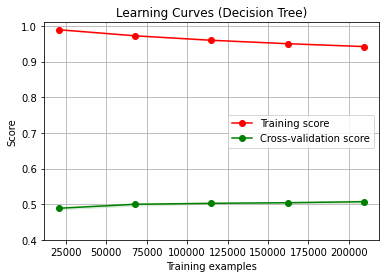

In [62]:
title = "Learning Curves (Decision Tree)"
a = plot_learning_curve(dtc_best_estimator, title, X_train_transform, y_train)

#### **8.1.2. Modelo 2: Random Forest**

[learning_curve] Training set sizes: [ 20919  67989 115058 162127 209197]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  7.3min finished


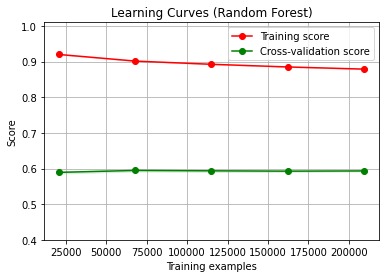

In [63]:
title = "Learning Curves (Random Forest)"
a = plot_learning_curve(rfc_best_estimator, title, X_train_transform, y_train)

### **8.2. Model Complexity**

In [64]:
def model_complexity(estimator, title, param_name, values_param, scoring, X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    cv = ShuffleSplit(n_splits=5, random_state=RANDOM_STATE)
    

    # Vary the max_depth parameter from 1 to 10

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(
        estimator, X, y,
        param_name=param_name,
        param_range=values_param, 
        cv=cv, 
        scoring=scoring,
        n_jobs=-1,
        verbose=True
    )

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    ylim=(0.4, 1.01)
    plt.ylim(*ylim)
    plt.title(title)
    plt.grid()
    plt.plot(values_param, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(values_param, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(values_param, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(values_param, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel(param_name)
    plt.ylabel(scoring)
    plt.show()

#### **8.2.1. Modelo 1: Decision Tree**

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


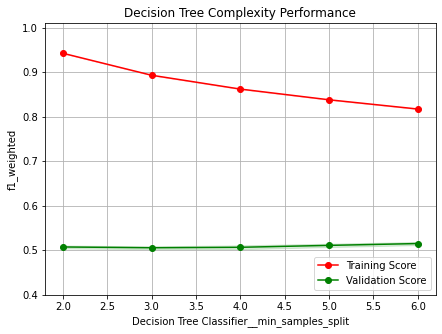

In [65]:
param_name='Decision Tree Classifier__min_samples_split'
values_param = np.arange(1,7)
scoring='f1_weighted'
title='Decision Tree Complexity Performance'
model_complexity(dtc_best_estimator, title, param_name, values_param, scoring, X_train_transform, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished


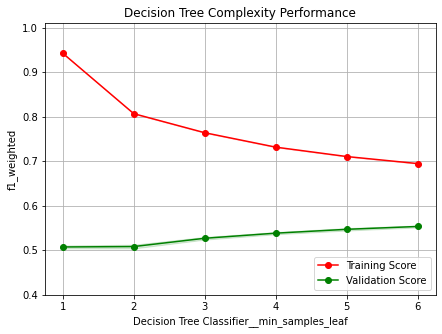

In [75]:
param_name='Decision Tree Classifier__min_samples_leaf'
values_param = np.arange(1,7)
scoring='f1_weighted'
title='Decision Tree Complexity Performance'
model_complexity(dtc_best_estimator, title, param_name, values_param, scoring, X_train_transform, y_train)

#### **8.2.2. Modelo 2: Random Forest**

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 15.6min finished


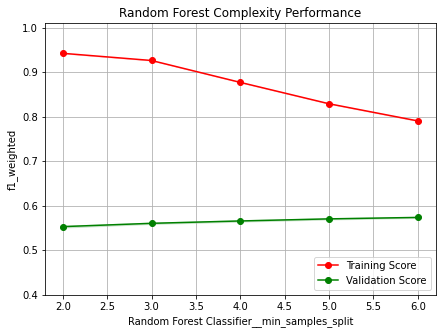

In [66]:
param_name='Random Forest Classifier__min_samples_split'
values_param = np.arange(1,7)
scoring='f1_weighted'
title='Random Forest Complexity Performance'
model_complexity(rfc_best_estimator, title, param_name, values_param, scoring, X_train_transform, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.1min finished


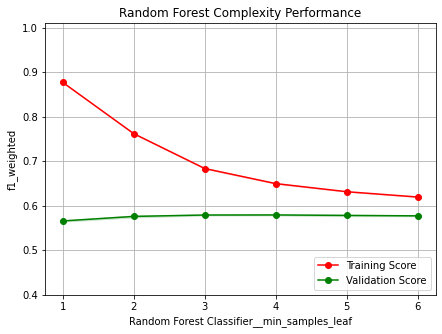

In [76]:
param_name='Random Forest Classifier__min_samples_leaf'
values_param = np.arange(1,7)
scoring='f1_weighted'
title='Random Forest Complexity Performance'
model_complexity(rfc_best_estimator, title, param_name, values_param, scoring, X_train_transform, y_train)

## **9. Realize a predição sobre os dados test_call_data.csv, disponibilizado a parte do arquivo Call_Data.csv, como o seu modelo saiu?** (1,0 ponto)

In [68]:
predictions = dtc_best_estimator[0].predict(X_test_transform)
print(classification_report(y_test, predictions))

                                            precision    recall  f1-score   support

CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)       0.72      0.82      0.77      2868
                 FALSE COMPLAINT/UNFOUNDED       0.94      0.96      0.95      1074
                        ORAL WARNING GIVEN       0.83      0.87      0.85      5217
                      PHYSICAL ARREST MADE       0.90      0.76      0.83      2043
                   PROBLEM SOLVING PROJECT       0.91      0.70      0.79       790
                REPORT WRITTEN (NO ARREST)       0.94      0.91      0.93      8519
  UNABLE TO LOCATE INCIDENT OR COMPLAINANT       0.79      0.81      0.80      2584

                                  accuracy                           0.86     23095
                                 macro avg       0.86      0.83      0.84     23095
                              weighted avg       0.87      0.86      0.86     23095



In [69]:

predictions = rfc_best_estimator[0].predict(X_test_transform)
print(classification_report(y_test, predictions))

                                            precision    recall  f1-score   support

CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)       0.81      0.78      0.79      2868
                 FALSE COMPLAINT/UNFOUNDED       0.96      0.88      0.92      1074
                        ORAL WARNING GIVEN       0.82      0.85      0.83      5217
                      PHYSICAL ARREST MADE       0.87      0.64      0.74      2043
                   PROBLEM SOLVING PROJECT       0.82      0.69      0.75       790
                REPORT WRITTEN (NO ARREST)       0.86      0.97      0.91      8519
  UNABLE TO LOCATE INCIDENT OR COMPLAINANT       0.95      0.79      0.86      2584

                                  accuracy                           0.85     23095
                                 macro avg       0.87      0.80      0.83     23095
                              weighted avg       0.86      0.85      0.85     23095



## **10. Se seu modelo permitir analisar a importância das features, analise-o e tente justificar de forma subjetiva a importância das features. Por exemplo, a feature chamadas_a_noite possui um alto coeficiente, pois há uma tendência dos crimes acontecerem a noite, não tão simples assim :P.** (1,0 ponto)

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

### **Resposta:**

#### Prefácio da Análise

* Para realizar uma análise de importância de *features*, primeiro é preciso identificar as melhores.
* Vamos usar dois métodos e verificar a interseção entre as vinte features mais importantes.
  * **SelectKBest** com $\chi^2$. Como as features e a variável alvo são categóricas, o teste de $\chi^2$ é o recomendado.
  * **RFE** que faz um ranqueamento de importância usando a eliminação de feature de forma recursiva.
* Houve a necessidade de tratar a feature **Lead Time** para ser um valor maior que zero.

#### Análise

* Verificamos que os **Call Time** e os **Shift** estão entre as 20 features consideradas mais importantes.
* Em quase todos os tipos de **Call Time** que ocorreram durante a madrugada **Shift_0-Dawn** determinaram **Event Clearance Description**

In [71]:
# Ajustando a escala da feature 'Lead Time' pois existem valores negativos
max_abs_scaler =  MinMaxScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train_transform['Lead Time'].values.reshape(-1, 1))
X_train_transform['Lead Time'] = X_train_maxabs
X_train_transform['Lead Time']

0         0.999704
1         0.999702
2         0.999702
3         0.019370
4         0.999702
            ...   
232437    0.999702
232438    0.999702
232439    0.999702
232440    0.999702
232441    0.999702
Name: Lead Time, Length: 232442, dtype: float64

In [72]:
k = 20
le = LabelEncoder()
le.fit(y_train)
y = le.transform(y_train)

bestfeatures = SelectKBest(score_func=chi2, k=k)
fit = bestfeatures.fit(X_train_transform, y=y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_transform.columns)
# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] # naming the dataframe columns
print(featureScores.nlargest(k,'Score'))

                                        Specs          Score
5                         (Call Type_ONVIEW,)  165986.603240
1                                    Priority   81932.656484
8           (Call Type_POLICE (VARDA) ALARM,)   63925.169567
4       (Call Type_TELEPHONE OTHER, NOT 911,)   24468.347228
12   (Call Type_SCHEDULED EVENT (RECURRING),)   21189.563220
89       (Original Time Queued Shift_0-Dawn,)    4845.807422
90    (Original Time Queued Shift_1-Morning,)    3639.558876
60                                 (Beat_S2,)    3194.378638
18                        (Precinct_UNKNOWN,)    2814.026164
14                          (Precinct_NORTH,)    2430.138781
26                             (Sector_MARY,)    2386.521507
2                   Original Time Queued Hour    2223.772996
28                              (Sector_SAM,)    1873.883592
20                             (Sector_KING,)    1400.244678
0                                   Lead Time    1378.145656
92      (Original Time Q

In [73]:
estimator = DecisionTreeClassifier(random_state=RANDOM_STATE)
selector = RFE(estimator=estimator, n_features_to_select=k, step=1, verbose=False)
selector = selector.fit(X_train_transform, y=y)
selector.support_
selector.ranking_
dfscores = pd.DataFrame(selector.ranking_)
dfcolumns = pd.DataFrame(X_train_transform.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] # naming the dataframe columns
print(featureScores.nlargest(k,'Score'))

                                         Specs  Score
7   (Call Type_ALARM CALL (NOT POLICE ALARM),)     81
11  (Call Type_PROACTIVE (OFFICER INITIATED),)     80
6                             (Call Type_911,)     79
10           (Call Type_HISTORY CALL (RETRO),)     78
9             (Call Type_IN PERSON COMPLAINT,)     77
17                            (Precinct_EAST,)     76
85                                  (Beat_C1,)     75
23                              (Sector_JOHN,)     74
71                                  (Beat_G3,)     73
73                                  (Beat_S1,)     72
62                                  (Beat_E2,)     71
67                                  (Beat_K3,)     70
21                              (Sector_NORA,)     69
89        (Original Time Queued Shift_0-Dawn,)     68
88                                  (Beat_F2,)     67
24                             (Sector_DAVID,)     66
35                           (Sector_CHARLIE,)     65
55                          

## **11. Aplique clusterização, preferencialmente o KMeans sobre o dado, e comunique suas novas descobertas, sinta-se a vontade para apresentar uma solução com recursos visuais.** (2,0 pontos)

In [77]:
from sklearn.cluster import KMeans
from time import time 

tic_kmeans = time()
kmeans = KMeans(n_clusters=7, random_state=RANDOM_STATE)
kmeans.fit(X_train_transform)
pd.DataFrame(kmeans.labels_, columns = ['Label'])['Label'].value_counts()
toc_kmeans = time()
print(f"Done in {toc_kmeans - tic_kmeans:.3f}s")

Done in 6.117s


In [79]:
from sklearn.metrics import silhouette_score
preds = kmeans.predict(X_train_transform)
silhouette_score(X_train_transform, preds)

In [ ]:
sil = []
for k in range(2, 15):
    kmeans_ = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans_.fit(X_train_transform)
    sil.append(silhouette_score(X_train_transform, kmeans_.predict(X_train_transform)))

cluster = np.arange(2, 15)
sil = np.array(sil)

plt.figure(figsize = (15, 6))
plt.plot(cluster, sil, 'b*-')

plt.title("Silhouette Curve", fontsize = 20)
plt.xlabel("Clusters", fontsize = 12)
plt.ylabel("Silhouette", fontsize = 12)

plt.xticks(cluster)
plt.grid()

plt.show()

# Bom trabalho!